In [1]:
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats

# read simulation outputs

filename = '../simulations/ngspice/tb_ldo_g1_stb_433_20250919.raw'
with open(filename, 'r') as f:
    d1 = f.readlines()

variables = int(d1[5][15:])
print(variables)
points = int(d1[6][12:])
print(points)

var_names = []
for i in range(0,variables):
    var_names.append(d1[8+i])


3
801


In [2]:
def read_data_from_index(points,variables,d,j):
    global freq,loopgain_db,phase_deg
    for i in range(0,points):
        aux = d[j+(variables+1)*i]
        aux = aux.split()[1]
        freq.append(float(aux.split(',')[0]))
        aux = d[j+1+(variables+1)*i]
        loopgain_db.append(float(aux.split(',')[0]))
        aux = d[j+2+(variables+1)*i]
        phase_deg.append(float(aux.split(',')[0]))


freq = []
loopgain_db = []
phase_deg = []

j = 12
read_data_from_index(points,variables,d1,j)


In [3]:
# read simulation outputs

filename = '../simulations/ngspice/tb_ldo_g2_stb_403_20250919.raw'
with open(filename, 'r') as f:
    d1 = f.readlines()

variables = int(d1[5][15:])
print(variables)
points = int(d1[6][12:])
print(points)

var_names = []
for i in range(0,variables):
    var_names.append(d1[8+i])

3
801


In [4]:
def read_data_from_index(points,variables,d,j):
    global freq2,loopgain_db2,phase_deg2
    for i in range(0,points):
        aux = d[j+(variables+1)*i]
        aux = aux.split()[1]
        freq2.append(float(aux.split(',')[0]))
        aux = d[j+1+(variables+1)*i]
        loopgain_db2.append(float(aux.split(',')[0]))
        aux = d[j+2+(variables+1)*i]
        phase_deg2.append(float(aux.split(',')[0]))


freq2 = []
loopgain_db2 = []
phase_deg2 = []

j = 12
read_data_from_index(points,variables,d1,j)

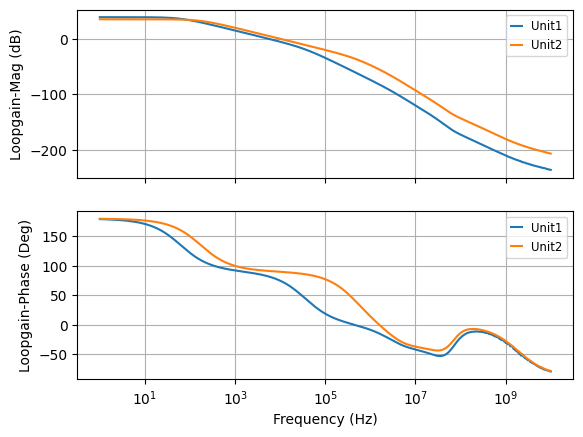

In [15]:
# ID vs VGS

fig, axs = plt.subplots(2,1,sharex='col')

axs[0].semilogx(np.array(freq), loopgain_db, label='Unit1')
axs[0].semilogx(np.array(freq2), loopgain_db2, label='Unit2')
axs[0].set_ylabel('Loopgain-Mag (dB)')
#axs[0].set_xlim(325,500)
axs[0].grid()
axs[0].legend(loc='upper right',fontsize='small',handlelength=1.0)

axs[1].semilogx(np.array(freq), phase_deg, label='Unit1')
axs[1].semilogx(np.array(freq2), phase_deg2, label='Unit2')
axs[1].set_ylabel('Loopgain-Phase (Deg)')
axs[1].set_xlabel('Frequency (Hz)')
#axs[1].set_xlim(325,500)
axs[1].grid()
axs[1].legend(loc='upper right',fontsize='small',handlelength=1.0)

plt.show()
